In [46]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import mpl_toolkits.axes_grid1 as axes_grid1
import numpy as np 

# 1) Load Data

In [47]:
# Load Data
(xTrain,yTrain),(xTest,yTest)=tf.keras.datasets.fashion_mnist.load_data()

In [72]:
xTrain.shape
xTest.shape

(10000, 28, 28)

In [48]:
print("Terdapat =",xTrain.shape[0]," data latih yang berukuran {}x{}".format(xTrain.shape[1],xTrain.shape[2]))
print("Terdapat =",xTest.shape[0]," data uji yang berukuran {}x{}".format(xTrain.shape[1],xTest.shape[2]))

Terdapat = 60000  data latih yang berukuran 28x28
Terdapat = 10000  data uji yang berukuran 28x28


# 2) Memvisualisasikan Data

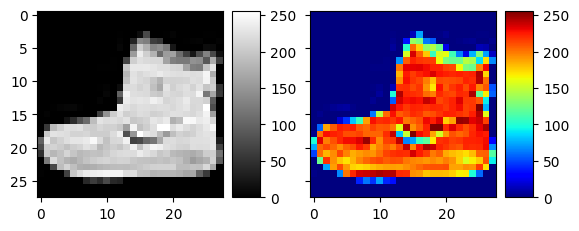

In [49]:
fig = plt.figure()
grid = axes_grid1.AxesGrid(
    fig, 111, nrows_ncols=(1, 2), axes_pad = 0.5, cbar_location = "right",
    cbar_mode="each", cbar_size="15%", cbar_pad="5%",)

im0 = grid[0].imshow(xTrain[0], cmap='gray', interpolation='nearest')
grid.cbar_axes[0].colorbar(im0)

im1 = grid[1].imshow(xTrain[0], cmap='jet', interpolation='nearest')
grid.cbar_axes[1].colorbar(im1)

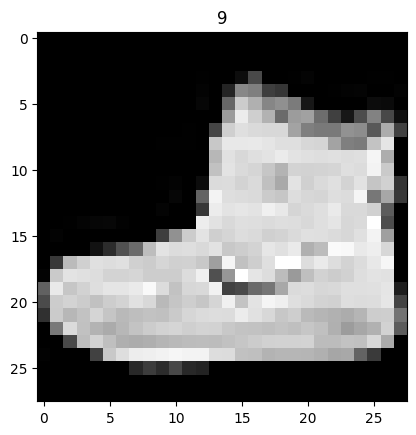

In [50]:
plt.imshow(xTrain[0],cmap="gray")
plt.title(str(yTrain[0]))
plt.show()

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

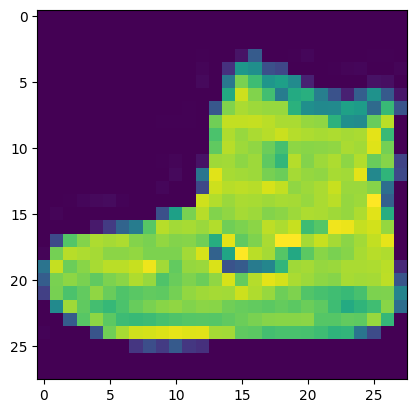

In [51]:
# Set number of characters per row when printing
np.set_printoptions(linewidth=320)
# You can put between 0 to 59999 here
index = 0

# Print the label and image
print(f'LABEL: {yTrain[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {xTrain[index]}')

# Visualize the image
plt.imshow(xTrain[index])

# 3) Normalisasi

In [52]:
xTrain=xTrain/255.0
xTest=xTest/255.0

# 4) Modelling

In [53]:
model = tf.keras.models.Sequential([tf.keras.Input(shape=(28,28)),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [54]:
# Test Softmax

# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.nn.softmax(inputs) # sama dengan tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(xTrain, yTrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4985 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3779 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3363 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3147 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2972 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2806 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2676 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2586 - accuracy: 0.9026
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2482 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.239

In [57]:
print(xTest.shape)

(10000, 28, 28)


In [58]:
# Evaluate the model on unseen data
model.evaluate(xTest, yTest)

313/313 [==============================] - 0s 818us/step - loss: 0.3307 - accuracy: 0.8841


[0.33073392510414124, 0.8841000199317932]

# 4)Soal

In [60]:
classifications = model.predict(xTest)

print(classifications[0])

313/313 [==============================] - 0s 774us/step
[2.3957685e-07 4.7415003e-07 1.3258951e-08 4.5311976e-09 6.3067951e-08 7.9836035e-03 1.2127017e-06 4.0100720e-02 7.6100528e-06 9.5190603e-01]


## 4.1 Ganti Epoch

In [63]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4719 - accuracy: 0.8324
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3555 - accuracy: 0.8699
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3216 - accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2977 - accuracy: 0.8906
Epoch 5/5
313/313 [==============================] - 0s 857us/step
[5.6322087e-06 2.0932308e-08 6.7259791e-08 1.4745295e-07 1.2716889e-07 1.5339124e-02 3.6765146e-06 3.3659469e-02 2.3249929e-06 9.5098937e-01]
9


In [65]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
                                ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4739 - accuracy: 0.8296
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3574 - accuracy: 0.8698
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3208 - accuracy: 0.8816
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2971 - accuracy: 0.8904
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[4.06740128e-07 7.25409393e-07 1.64901792e-07 7.82571163e-09 1.04254084e-07 9.15909361e-04 9.46521510e-08 3.47078890e-02 9.63460991e-08 9.64374542e-01]
9


## 4.2 Ganti output neuron lebih kecil dari jumlah kelas

In [66]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(9, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\arthu\AppData\Local\Temp\ipykernel_14288\4091726556.py", line 16, in <module>
      model.fit(training_images, training_labels, epochs=5)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\Users\arthu\Documents\CODE\Python\NeuralNetwork\.venv\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 9 which is outside the valid range of [0, 9).  Label values: 9 5 0 3 7 6 6 7 0 5 1 3 0 9 9 3 5 1 8 2 2 8 2 0 5 6 0 0 7 5 9 7
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_304879]

## 4.3 Coba tanpa normalisasi

In [70]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0 # Experiment with removing this line
test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4767 - accuracy: 0.8298
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3578 - accuracy: 0.8694
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3227 - accuracy: 0.8815
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3006 - accuracy: 0.8896
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
[6.4852230e-08 1.1001829e-08 7.0161010e-09 7.6799722e-09 5.1190492e-09 1.0506664e-02 2.7853352e-07 1.7381953e-02 1.6683164e-07 9.7211087e-01]
9


In [69]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.8107 - accuracy: 0.7696
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5329 - accuracy: 0.8178
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5026 - accuracy: 0.8279
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4910 - accuracy: 0.8354
Epoch 5/5
313/313 [==============================] - 0s 885us/step
[4.2025680e-10 3.1096381e-10 1.4849653e-14 1.2479574e-10 4.4523329e-16 7.0040844e-02 3.9339788e-11 8.1233464e-02 1.4278494e-09 8.4872574e-01]
9


## 4.4 Pakai callback untuk memantau akurasi

In [71]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1853/1875 [============================>.] - ETA: 0s - loss: 0.4749 - accuracy: 0.8313
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4736 - accuracy: 0.8317
